# Do you really need to know Python/SQL/Tableau to become a Data Scientist?

## Table of Contents

1. [Introduction](#intro)
2. [Data Clean and Prep](#clean)
3. [Part 1: Analysis](#part1)
4. [Part 2: Demographics](#part2)

## Introduction <a id = 'intro'></a>

    Objective
I am currently on winter break from my masters program and I wanted to to brush up on my data science skills in preparation for applying for jobs. Upon looking at some job postings, I noticed a pattern: most data science related positions require skills in Python, SQL, and Tableau. I wondered, do you really need all three of these for a data science job? What if you only have one, two, three, or even none of these skills? How do these skills relate to other positions suchs as data analysts and business analysts? This is my quest: to understand the impact of having the "trifecta" of data science skills. 

It's necessary to point out that the skills are not mutually exclusively in terms of analytics accomplished and purpose. Python can also query data just like SQL and also produce vibrant visualizations like Tableau. SQL is also a programming language but it specializes in querying and storing data and is not as multi-faceted as Python. 

Note: I will be referencing these skills as the "trifecta" because of how prevalant I've heard about them in school, job postings, and fellow students. 

    Short Answer:

The answer to my question of do I really need to know Python/SQL/Tableau is... yes. The distinction mostly occurs when comparing participants with a low count of skills (0 or 1 of the skills) to high count of skills (2 or 3 of the skills). Participants with a high count, generally have more of a likelihood of having a data science role, and a higher salary. 

    Background
I have left my engineering role in pursuit of something more technical, data orientated, and where reasoning is powered by science. I started in January and have obtained all three skills in by May, although by all means not an expert in each. I was able to work on an internship that required heavy usage of SQL during the summer. So I have a feel for what it is like to have one of the trifecta skills. At these point, I consider myself just crossing the line from begineer to intermediate. Since data science roles are scarce, I hope to start out with a job related to data, most likely a business or data analyst, then move to data science. 

## Data Clean and Prep <a id = 'clean'></a>

Before I begin to explain my reasoning, we need to prep the data, and make some assumptions.

    Prep work:
1) I will only be only selecting participants from the United States of America. I understand that there can be slight nuances going from country to country; salaries will need to be adjusted,  and job roles can vary. For simplicity, I will be concentrating on the United states of America, althought all the analysis can be easily redone for another country. 

2) I will drop all participants who have left question 5 (choosing title similar to current role) empty. Having an answer to this question is paramount to my analysis. 

3) It is helpful to drop the first column in the dataset (time used to answer survey) to greatly reduce the cpu usage. The row contains multiple datatypes so it uses alot of memory. It's also not necessary for my analysis and to prove my point. Alternatively, we can drop the first row first then change the data type of the first column to be integer. 

    Assumptions:
1) Knowing Python will be expanded to having programming experience. Question 7 will be deciding question if the participant has programming experience or not. All programming experience will be grouped together. So, having R or Matlab or Python skills will be considered the same as having programming experience.

2) Having SQL skills will be expanded to having big data product experience. Question 29 will be the deciding question for having experience in big data products. SQL is a big data tool. So having at least 1 skill in the question will count towards having experience in big data. 

3) Having Tableau skills will be expanded to having business intelligence experience. Questions 31 will be the deciding question for having experience in business intelligence tools. Tableau is a business intelligence tool so having any other BI experience will deemed equal experience.

4) For questions with the possiblility to select more than one answer choice, if they are all empty, then I assume the participant has none of those items. The answer choice will be changed to 'None'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

df = pd.read_csv('kaggle_survey_2020_responses.csv')

C:\Users\dhuan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Remove first row
df = df.iloc[1:]
df = df.reset_index(drop = True)

# Change first column to integer data type
# the first row made this column a mixed data type column causing it to take alot of memory
df = df.astype({'Time from Start to Finish (seconds)': 'int32'})

In [3]:
# Remove first column (optional)
# df = df.iloc[:,1:]

In [4]:
# Drop rows were Q5 is empty
# Very ineficient way (looping through and dropping takes a long time, better to select)
# Drop rows where question 5 is empty
#q5_drop_count = 0
#for i in range(len(df)):
    #if pd.isna(df.at[i, 'Q5']):
        #q5_drop_count += 1
        #df = df.drop(i)
# Reset index
#df = df.reset_index(drop = True)
# Display rows dropped
#print('rows dropped because q5 was empty: ' + str(q5_drop_count))

In [5]:
# Select all data where Q5 contains an asnwer 
df = df[df['Q5'].notna()]
len(df)

19277

In [6]:
# Select only US participants
df = df.loc[(df['Q3'] == 'United States of America')]
df = df.reset_index(drop = True)

In [7]:
# Num of rows, will be used later to check process
len(df)

2199

In [8]:
# Question 7
# Check current count of 'None' 
df['Q7_Part_12'].value_counts()

None    44
Name: Q7_Part_12, dtype: int64

In [9]:
# Inefficient way to change question 7 part 12 to none
# Question 7
# If all parts of question 7 are empty, assume none, so input "None" option
#cols = ['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6',
               #'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12' ,'Q7_OTHER']
#for i in range(len(df)):
    #check = []
    #for x in cols:
        #check_ele = pd.isnull(df.at[i,x]) # true if there is a value
        #check.append(check_ele)
    #if sum(check) == len(cols):
        #df.at[i,'Q7_Part_12'] = 'None'

# See new count of 'None'
#df['Q7_Part_12'].value_counts()

In [10]:
# change question 7 to no programming experience to none if all are na
df['Q7_Part_12'] = np.where((df['Q7_Part_1'].isnull() & df['Q7_Part_2'].isnull() & df['Q7_Part_3'].isnull() 
                       & df['Q7_Part_4'].isnull() & df['Q7_Part_5'].isnull() & df['Q7_Part_6'].isnull() 
                       & df['Q7_Part_7'].isnull() & df['Q7_Part_8'].isnull() & df['Q7_Part_9'].isnull() 
                       & df['Q7_Part_10'].isnull() & df['Q7_Part_11'].isnull() & df['Q7_OTHER'].isnull()),
                      'None',
                      None) 

# create column to check for programming experience
df['Programming Experience'] = np.where((df['Q7_Part_12'] != 'None'), True, False)
df['Programming Experience'].value_counts()

True     2035
False     164
Name: Programming Experience, dtype: int64

In [11]:
# change question 29A to no database experience to none if all are na
df['Q29_A_Part_17'] = np.where((df['Q29_A_Part_1'].isnull() & df['Q29_A_Part_2'].isnull() & df['Q29_A_Part_3'].isnull() 
                             & df['Q29_A_Part_4'].isnull() & df['Q29_A_Part_5'].isnull() & df['Q29_A_Part_6'].isnull() 
                             & df['Q29_A_Part_7'].isnull() & df['Q29_A_Part_8'].isnull() & df['Q29_A_Part_9'].isnull() 
                             & df['Q29_A_Part_10'].isnull() & df['Q29_A_Part_11'].isnull() & df['Q29_A_Part_12'].isnull()
                             & df['Q29_A_Part_13'].isnull() & df['Q29_A_Part_14'].isnull() & df['Q29_A_Part_15'].isnull()
                             & df['Q29_A_Part_16'].isnull() & df['Q29_A_OTHER'].isnull()),
                            'None',
                            None) 

# create column to check for programming experience
df['Database Experience'] = np.where((df['Q29_A_Part_17'] != 'None'), True, False)

df['Database Experience'].value_counts()

False    1361
True      838
Name: Database Experience, dtype: int64

In [12]:
# change question 31A to no business intelligence experience to none if all are na
df['Q31_A_Part_14'] = np.where((df['Q31_A_Part_1'].isnull() & df['Q31_A_Part_2'].isnull() & df['Q31_A_Part_3'].isnull() 
                             & df['Q31_A_Part_4'].isnull() & df['Q31_A_Part_5'].isnull() & df['Q31_A_Part_6'].isnull() 
                             & df['Q31_A_Part_7'].isnull() & df['Q31_A_Part_8'].isnull() & df['Q31_A_Part_9'].isnull() 
                             & df['Q31_A_Part_10'].isnull() & df['Q31_A_Part_11'].isnull() & df['Q31_A_Part_12'].isnull()
                             & df['Q31_A_Part_13'].isnull() & df['Q31_A_OTHER'].isnull()),
                            'None',
                            None) 

# create column to check for programming experience
df['Business Intelligence Experience'] = np.where((df['Q31_A_Part_14'] != 'None'), True, False)

df['Business Intelligence Experience'].value_counts()

False    1642
True      557
Name: Business Intelligence Experience, dtype: int64

In [13]:
# Make all NaN values as string 'N/A' for easier programming later
df = df.fillna('N/A')

In [14]:
# Create new dataframe with all 3 of skills
# These dataframes will be helpful later
df_tri = df.loc[((df['Programming Experience'] == True ) & (df['Database Experience'] == True) 
                    & (df['Business Intelligence Experience'] == True))]

In [15]:
# Create new dataframe with 2 of skills
df_two = df.loc[((df['Programming Experience'] == True ) & (df['Database Experience'] == True) 
                    & (df['Business Intelligence Experience'] == False))
                
               | ((df['Programming Experience'] == True ) & (df['Database Experience'] == False) 
                    & (df['Business Intelligence Experience'] == True))
                
               | ((df['Programming Experience'] == False ) & (df['Database Experience'] == True) 
                    & (df['Business Intelligence Experience'] == True))]

In [16]:
# Create new dataframe with only 1 of skills
df_one = df.loc[((df['Programming Experience'] == True ) & (df['Database Experience'] == False) 
                    & (df['Business Intelligence Experience'] == False))
                
               | ((df['Programming Experience'] == False ) & (df['Database Experience'] == True) 
                    & (df['Business Intelligence Experience'] == False))
                
               | ((df['Programming Experience'] == False ) & (df['Database Experience'] == False) 
                    & (df['Business Intelligence Experience'] == True))]

In [17]:
# Create new dataframe with 0 of skills
df_zero = df.loc[((df['Programming Experience'] == False ) & (df['Database Experience'] == False) 
                    & (df['Business Intelligence Experience'] == False))]

In [18]:
# Check dataframe creations, should be len of df
len(df_tri) + len(df_two) + len(df_one) + len(df_zero)

2199

In [19]:
# Add new column counting number of skills
# Note python doesnt like this method -> df_tri['Count of Skills'] = 3

df_tri.insert(0, 'Count of Skills', 3)
df_two.insert(0, 'Count of Skills', 2)
df_one.insert(0, 'Count of Skills', 1)
df_zero.insert(0, 'Count of Skills', 0)

In [20]:
# Put all dataframes together
newdf = pd.concat([df_tri, df_two, df_one, df_zero])
newdf = newdf.fillna('N/A')

## Part 1: Analysis <a id = 'part1'></a>

First, we'll take a simple look at the participants and what percent of them have a certain amount of skills. We'll also compare to that group's percent of people who responded as being a data scientist. This will give us a general idea of what is to follow. 

From the plot, we can see that almost half of the participants have one of the skills. As the number of trifecta skills increase, the percent of that group consisting of data scientists also increases. This is interesting, now we have an idea that number of the trifecta skills correlate to being a data scientist.

In [21]:
# Percentage plot
percentage_group = newdf.groupby(['Count of Skills'])['Q1'].count()
percentage_group = percentage_group / sum(percentage_group)
percentage_group = percentage_group.reset_index().rename(columns = { 'Q1': 'Percentage'})

# add another axis
data_crosstab = pd.crosstab(newdf['Count of Skills'], newdf['Q5'], margins = True)
percentage_group.insert(0, 'Percent Data Scientists', 0)
counts_list = list(newdf['Count of Skills'].unique())

for i in counts_list:
    ds = data_crosstab.at[i, 'Data Scientist'] / data_crosstab.at[i, 'All']
    percentage_group.loc[i, 'Percent Data Scientists'] = ds

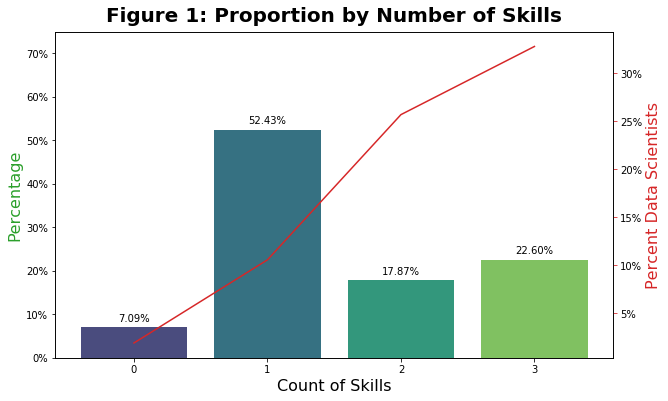

In [22]:
# Figure 1 
#sns.axes_style('dark')

#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'

#bar plot creation
ax1.set_title('Figure 1: Proportion by Number of Skills', fontsize=16, weight='bold', pad=10, size=20)
ax1.set_xlabel('', fontsize=16)
ax1.set_ylabel('', fontsize=16, color = color)
ax1 = sns.barplot(x='Count of Skills', y='Percentage', data = percentage_group, palette='viridis')
ax1.tick_params(axis='y')
ax1.grid(False)
ax1.set(ylim=(0, .75))

# change y axis
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

# annotate bar plots
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
#format(p.get_height(), '.2f')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

#line plot creation
ax2.set_ylabel('', fontsize=16, color=color)
ax2 = sns.lineplot(x='Count of Skills', y='Percent Data Scientists', data = percentage_group, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax2.grid(False)

# change y axis
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#show plot
plt.show()

I suspect the group with one skill will most likely have programming skills. Let's take a quick look at that at Figure 2. From the figure, we can see that participants with one of the trifecta skills have an overwelmingly proportion of the skills in programming. As noted early in this analysis, skills are not mutally exclusive. Programming can also accomplish similar functions of the big data and business intelligence tools. It's possible that people with one skill can be compensating the others by programming. 

Looking at the "Skill Count = 2" subplot, we can see that most participants with two skills tend to have experience in programming and big data tools.

In [23]:
# Percentage plot
# take percent_group from before
percentage_group.insert(0, 'Q7_Part_12', 0)
percentage_group.insert(0, 'Q29_A_Part_17', 0)
percentage_group.insert(0, 'Q31_A_Part_14', 0)

In [24]:
question_list = [ 'Q7_Part_12', 'Q29_A_Part_17', 'Q31_A_Part_14' ]
counts_list = [3,2,1,0]

for j in question_list:
     
    data_crosstab = pd.crosstab(newdf['Count of Skills'], newdf[j], margins = True)
    
    for i in counts_list:
        ds = data_crosstab.at[i, 'None'] / data_crosstab.at[i, 'All']
        ds = 1 - ds # inverse to get proportion of having this skill
        percentage_group.loc[i, j] = ds

In [25]:
percentage_group2 = percentage_group.rename(columns={'Q7_Part_12': "Programming", 
                                 'Q29_A_Part_17': "Big Data Tools", 
                                 'Q31_A_Part_14': 'Business Intelligence Tools'})
percentage_group2 = percentage_group2.drop(columns=['Percentage', 'Percent Data Scientists'])
#percentage_group2

In [26]:
reformatted = pd.melt(percentage_group2, id_vars="Count of Skills", var_name = 'Skills', value_name="Percentage")
#reformatted

Text(0.85, 1.25, 'Figure 2: Percent of Trifecta Skills Obtained by Number of Skill Group')

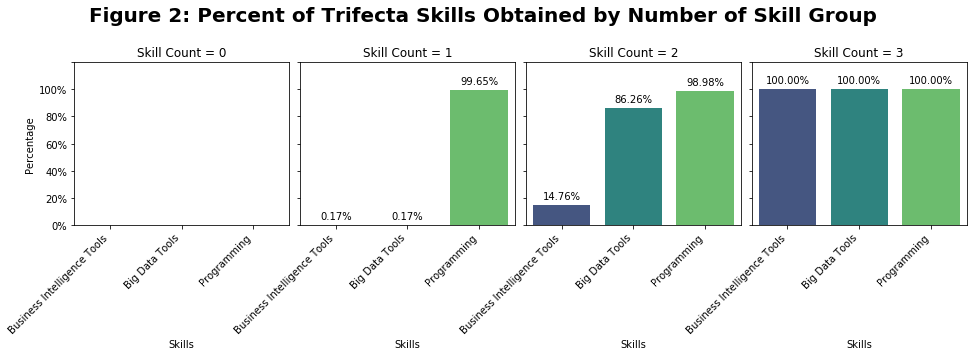

In [27]:
#plot settings
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(16,3))
fig.subplots_adjust(hspace=0.1, wspace=0.05)

#barplots
df0 = reformatted.loc[(reformatted['Count of Skills'] == 0)]
df1 = reformatted.loc[(reformatted['Count of Skills'] == 1)]
df2 = reformatted.loc[(reformatted['Count of Skills'] == 2)]
df3 = reformatted.loc[(reformatted['Count of Skills'] == 3)]

#=========
# 0 skills
sns.barplot(x = 'Skills', y = 'Percentage' , data = df0, ax = ax0, palette='viridis')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, horizontalalignment='right')
ax0.set(ylim=(0, 1.2))
vals = ax3.get_yticks()
ax0.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax0.title.set_text('Skill Count = 0')


#=========
# 1 skills
sns.barplot(x = 'Skills', y = 'Percentage' , data = df1, ax = ax1, palette='viridis')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

# sub plot title
ax1.title.set_text('Skill Count = 1')

# y axis
ax1.set(ylim=(0, 1.2))

# remove y axis
ax1.set_ylabel('')
ax1.set_yticklabels([])

# annotate bar plots
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

#=========
# 2 skills
sns.barplot(x = 'Skills', y = 'Percentage' , data = df2, ax = ax2, palette='viridis')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')

# sub plot title
ax2.title.set_text('Skill Count = 2')

# y axis
ax2.set(ylim=(0, 1.2))

# remove y axis
ax2.set_ylabel('')
ax2.set_yticklabels([])

# annotate bar plots
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
#=========
# 3 skills
sns.barplot(x = 'Skills', y = 'Percentage', data = df3, ax = ax3, palette='viridis')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')

# sub plot title
ax3.title.set_text('Skill Count = 3')

# y axis
ax3.set(ylim=(0, 1.2))

# remove y axis
ax3.set_ylabel('')
ax3.set_yticklabels([])

# annotate bar plots
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.2%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.text(0.85, 1.25, 'Figure 2: Percent of Trifecta Skills Obtained by Number of Skill Group',weight='bold',
         horizontalalignment='center',fontsize=20,transform = ax1.transAxes)

Let's compare the count of trifecta skills to job roles (Question 5). Heatmaps are my favorite and we will be using quite a bit of heatmaps. The y-axis will be denoting the number of trifecta skills. The x-axis will be the job titles, ordered by level of relation to data scientists. On the left will be non-related titles such as "Other" and "Currently not employed". Going to the right we have roles that are subjectively ordered by level of data science involved, with "Data Scientist" at the right most.

From the Figure 3 below, we can decipher two insights from this plot.

1) Participants with low count of skills ( 1 or 0) tend to be Students, Other, and Currently not employed.

2) Participants with high number of skills (2 or 3) tend to be Software Engineers, Data Analysts, and Data Scientists. 

So, if you have two or three skills, it is more likely you will be a data scientist.

In [28]:
# df : the dataframe that contains predicted clusters (null values should be string '0')
# x_category : takes one string of column name (column should be in df)
# y_category : takes one string of cluster column name (this should be in df) (values should be integers)
# size : takes (x,y) format for size of heatmap
# x_sort : takes list of custom sorted categories for x axis
# y_sort : takes list of custom sorted categories for y axis
# title : takes string for title

def probability_heatmap_single_col(df, x_category, y_category, x_sort, y_sort, size, title):
    #df = df.fillna('N/A')
    # Intialize
    intialize_df = pd.DataFrame(columns = [y_category, x_category, 'probability'])
    y_values = sorted(df[y_category].unique())
    x_values = sorted(df[x_category].unique()) 

    #x_values.remove('N/A')
    
    data_crosstab = pd.crosstab(df[y_category], df[x_category], margins = True)
    #data_crosstab = data_crosstab.drop('0', axis = 1)

    # calculations
    for j in x_values:   
        for i in y_values:
            prob = data_crosstab.at[i, j] / data_crosstab.at[i, 'All']
            intialize_df = intialize_df.append({y_category : i, x_category : j, 'probability':prob}, 
                                               ignore_index=True)
            
    #pivot map for seaborn heatmap
    pivot_df = intialize_df.pivot(index = y_category, columns = x_category, values = 'probability')
    
    # custom sorting Y-axis
    pivot_df.index = pd.CategoricalIndex(pivot_df.index, categories= y_sort)
    pivot_df.sort_index(level=0, inplace=True)
        
    # custom sorting X-axis
    pivot_df = pivot_df[x_sort]

    #set correlation graph size
    sns.set(font_scale=1)
    plt.figure(figsize = size)

    #correlation graph settings
    ax = sns.heatmap(pivot_df, vmin=0., vmax=1,cmap='viridis', fmt='.2f', annot = True,square = False,
                     linewidths = .5, cbar = True)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # set title
    plt.title(title, fontsize = 20, weight='bold', pad=10, size=20) 
    # show
    plt.show()

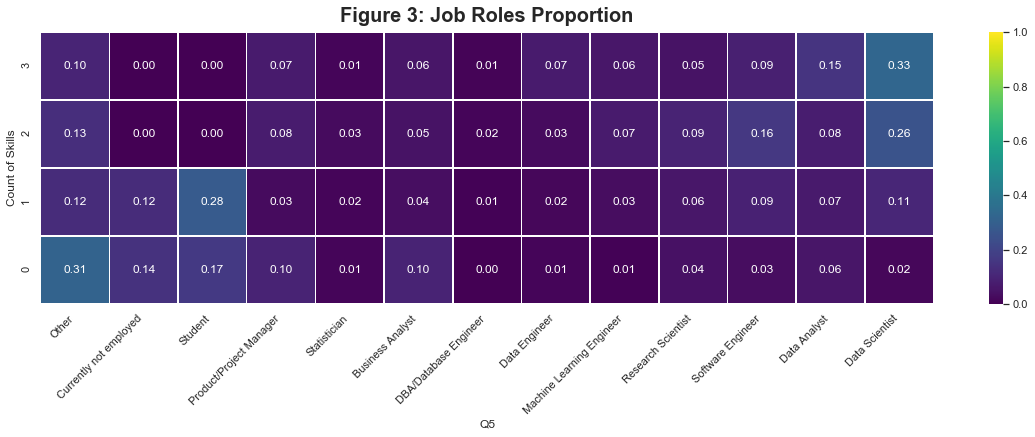

In [29]:
probability_heatmap_single_col(df = newdf, x_category = 'Q5' , y_category = 'Count of Skills', 
                               x_sort = ['Other', 'Currently not employed', 'Student', 
                                         'Product/Project Manager', 'Statistician', 'Business Analyst', 
                                         'DBA/Database Engineer', 'Data Engineer', 'Machine Learning Engineer', 
                                         'Research Scientist','Software Engineer','Data Analyst',
                                         'Data Scientist'],
                               y_sort= [3, 2, 1, 0], size = (20,5), title = 'Figure 3: Job Roles Proportion')

In [30]:
# df : the dataframe that contains predicted clusters (null values should be string '0')
# columns : takes list of column names (columns should be in df)
# y_category : takes one string of cluster column name (this should be in df) (values should be integers)
# size : takes (x,y) format for size of heatmap
# title : takes string for title

def probability_heatmap_multi_col(df,columns, y_category, x_sort, optional_size = (15,10), title = ''):
    intialize_df = pd.DataFrame(columns = [y_category, ' ', 'probability'])
    clusters_list = sorted(df[y_category].unique())
    
    for j in columns:
        data_crosstab = pd.crosstab(df[y_category], df[j], margins = True)
        
        column_value = list(df[j].unique())
        column_value.remove('N/A')
        column_value = column_value[0]
        
        for i in clusters_list:
            prob = data_crosstab.at[i, column_value] / data_crosstab.at[i, 'All']
            
            intialize_df = intialize_df.append({y_category : i, ' ' : column_value, 'probability':prob}, ignore_index=True)
            
    #pivot map for seaborn heatmap
    pivot_df = intialize_df.pivot(index = y_category, columns = ' ', values = 'probability')
    
    # custom sorting Y-axis
    pivot_df.index = pd.CategoricalIndex(pivot_df.index, categories= [3, 2, 1, 0])
    pivot_df.sort_index(level=0, inplace=True)
    
    # custom sorting X-axis
    pivot_df = pivot_df[x_sort]

    #set correlation graph size
    sns.set(font_scale=1)
    plt.figure(figsize = (optional_size))

    #correlation graph settings
    ax = sns.heatmap(pivot_df, vmin=0., vmax=1,cmap='viridis', fmt='.2f', annot = True,square = False,
                     linewidths = .5, cbar = True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # set title
    plt.title(title, fontsize = 20, weight='bold', pad=10, size=20) 
    # show
    plt.show()

Job titles can be sometimes ambigous and not related to the type of work you do. Some of us have been there before. Let's suplement this by looking at question 23, data science work involved. Now, let's take a look at the count of trifecta skills to job activities related to data science. I've ordered the x-axis from left most being data orientated functions, the middle being machine learning functions, and the right being non-related. For this graph, keep in mind that participants can have more than one of the choices chosen in the x-axis. 

There are two notable insights from this heatmap.

1) Participants with a high count (2 or 3) of the trifecta skills tend to have more job acitivites related to data science. This includes activities such as analyzing data to influence decisions, building machine learning prototypes, and building data structures or storing, analyzing, and opertionalizing data. 

2) Participants with a low count (1 or 0) of the trifecta skills tend to job activities less related to data science, especially in the options related to ML. 

So, if you have two or three of the skills, it is more likely you will be doing job activities related to data science. Are you starting to see a pattern yet? 

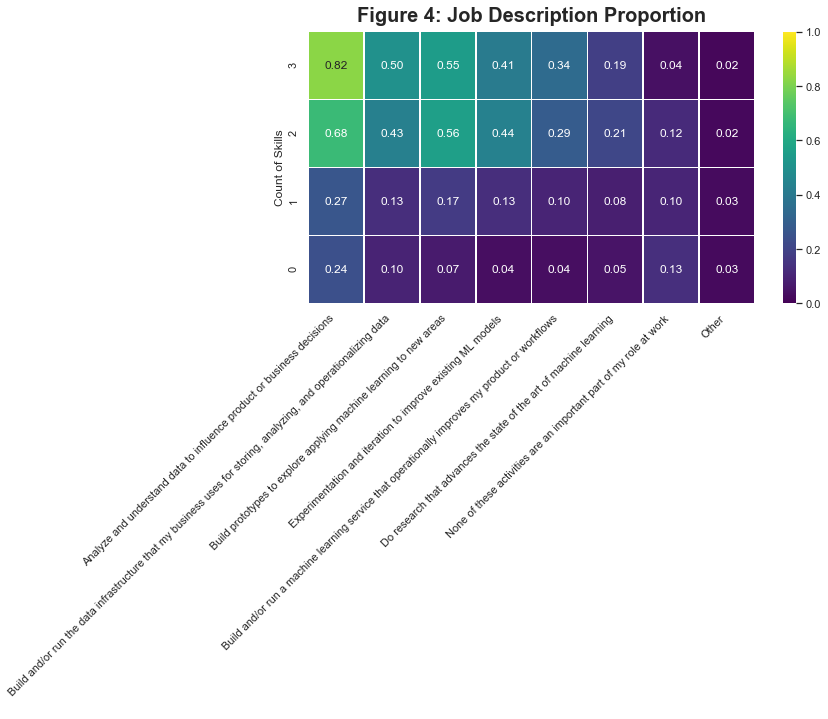

In [31]:
Q23_cols = ['Q23_Part_1', 'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6',
           'Q23_Part_7', 'Q23_OTHER']
x_sort = ['Analyze and understand data to influence product or business decisions', 
          'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
          'Build prototypes to explore applying machine learning to new areas', 
          'Experimentation and iteration to improve existing ML models', 
          'Build and/or run a machine learning service that operationally improves my product or workflows', 
          'Do research that advances the state of the art of machine learning', 
          'None of these activities are an important part of my role at work',
         'Other']
newdf = newdf.fillna('N/A')

probability_heatmap_multi_col(df = newdf, columns = Q23_cols , x_sort = x_sort, y_category = 'Count of Skills', optional_size = (10,5), 
                               title = 'Figure 4: Job Description Proportion')

Okay, last heatmap. Now let's take a look at salary levels per count of the trifecta skills. Count of trifecta skills is on the y-axis and salary is on the x-axis, ordered by dollar value. This is a very intereting plot. Almost half of low count of trifecta skills ( 1 to 0) do not answer the question. It is possible that participants are very confidential about their salary. Another possiblity is that participants have the option to skip this question and did not answer because they did not have a salary. For the high count of trifecta skills (2 or 3), participants tend to concentrate around the salary ranges of 100,000 to 199,999.

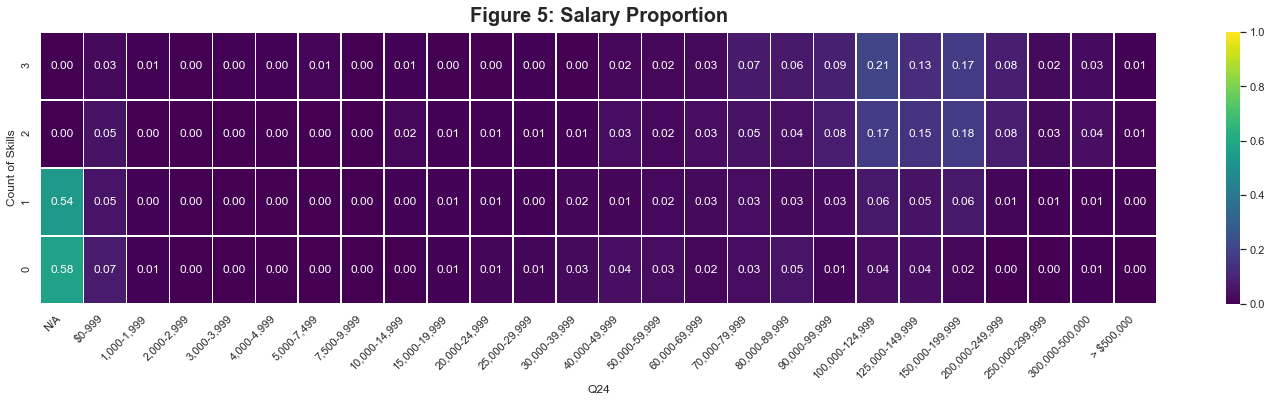

In [32]:
newdf = newdf.fillna('N/A')
probability_heatmap_single_col(df = newdf, x_category = 'Q24' , y_category = 'Count of Skills', 
                               x_sort = ['N/A','$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999',
                                         '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999',
                                         '20,000-24,999', '25,000-29,999','30,000-39,999', 
                                         '40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999',
                                         '80,000-89,999', '90,000-99,999','100,000-124,999', 
                                         '125,000-149,999','150,000-199,999','200,000-249,999',
                                         '250,000-299,999','300,000-500,000', '> $500,000'],
                               y_sort = [3, 2, 1, 0],
                               size = (25,5), 
                               title = 'Figure 5: Salary Proportion')

    Conclusion

What have we learned from our analysis? Here is a recap of what we learned from the plots we made:

    Details:

Figure 2:
For participants with "Count of Skill = 1", the participant is 99.65% chance of having that one skill in programming.
For participants with "Count of Skill = 2", the participant is 98.98% chance of having one skill in programming and a 86.26% propability of having the other skill in a big data tool. 

Figure 3:
When comparing the proportion of Data Scientists for Count of Skill = 1, 2, 3, we have the proportions of 0.11, 0.26, 0.33 respectively. 

Figure 4:
When comparing the job details between different skill count groups we generally see an increase in activities related to data, such as analyzing and understanding data to influence product or business decisions, increase as skills increase. For machine learning activities, such as building prototypes to explore applying machine learning to new areas, the greatest difference in proportions occurs whn comparing skill count group 1 to 2. 

Figure 5:
When comparing the proportion of salary ranges from 100,000 to 199,999 for Count of Skill = 1, 2, 3 we have proportions of 0.17, 0.50, and 0.51, respectively.


    Main Take-away:

If you want a higher chance of having a job title of Data Scientist, to perform job activities most relevant to data science, and to make a salary of 100,000 to 199,000, you have a higher chance if you have all three of the trifecta data science skills: programming, big data tools, and business intelligence tools.


## Part 2: Demographics <a id = 'part2'></a>

We have answered the main question of this notebook in Part 1: Analysis. Part 2 will be a bonus section where I explore more qualities of the different skill groups. 

The question for this part is: "Who are these people"? 

Let's take a look at the demographics. First up, age. We can plot separate bar graphs for each skill group and see the age distribution. 

    Insight from Figure 6 below:

1) We can see that participants with one of the skills, tend to concentrate around the age group of 25-29 and have a skewed normal distribution. 

2) Participants with all three of the skills have a more even distribution when compared to the skill group of 1. 


Text(1.05, 1.15, 'Figure 6: Age Percent Distribution by Number of Skill Group')

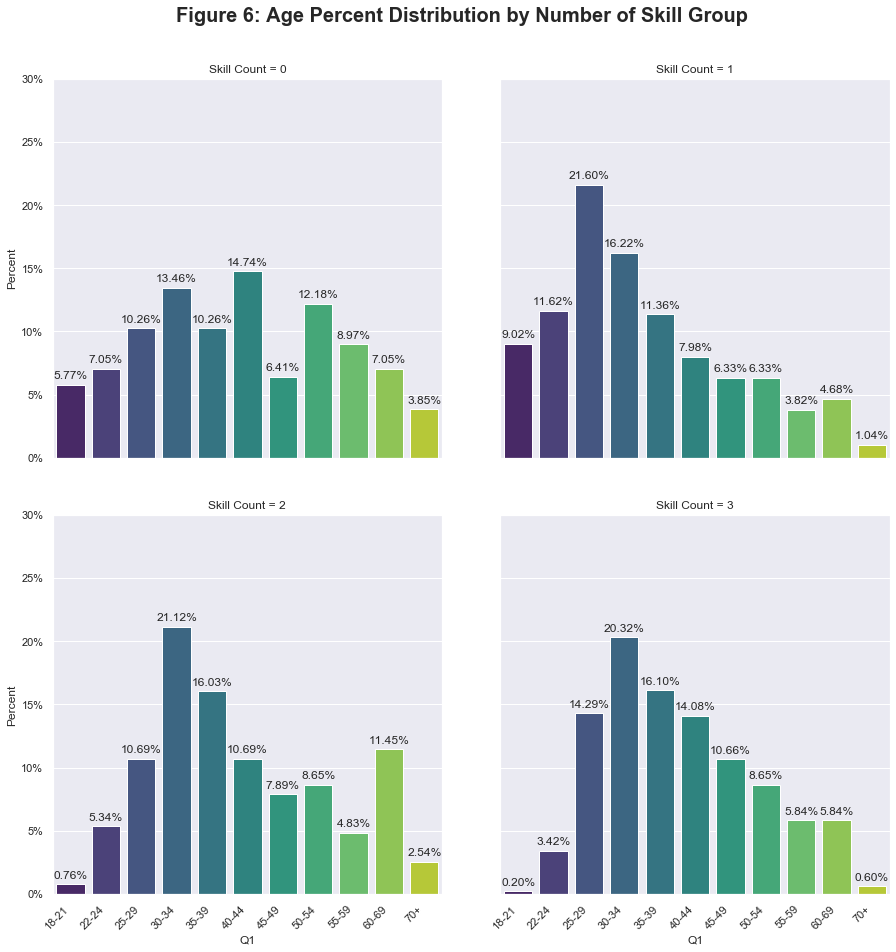

In [33]:
#plot settings
fig, axs = plt.subplots(2,2,figsize=(15,15),sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.15, wspace=0.15)
(ax0, ax1), (ax2, ax3) = axs

#===================
# Skill 0 count point

# Aggregate counts as percentages
grouped_count_0 = df_zero.groupby(by = ['Q1']).count().reset_index(drop = False)[['Q1', 'Count of Skills']]
grouped_count_0['Count of Skills'] = grouped_count_0['Count of Skills'] / sum(grouped_count_0['Count of Skills'])
grouped_count_0 = grouped_count_0.rename(columns={'Count of Skills': 'Percent'})
percent_df_0 = grouped_count_0
percent_df_0

# plot options
sns.barplot(x = 'Q1', y = 'Percent', data = percent_df_0, order = sorted(percent_df_0['Q1'].unique()), ax = ax0,
            palette='viridis')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, horizontalalignment='right')
ax0.set(ylim=(0, .3))
ax0.set_xlabel('')
vals = ax0.get_yticks()
ax0.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax0.title.set_text('Skill Count = 0')


# annotate bar plots
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.2%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

#===================
# Skill 1 count point

# Aggregate counts as percentages
grouped_count_1 = df_one.groupby(by = ['Q1']).count().reset_index(drop = False)[['Q1', 'Count of Skills']]
grouped_count_1['Count of Skills'] = grouped_count_1['Count of Skills'] / sum(grouped_count_1['Count of Skills'])
grouped_count_1 = grouped_count_1.rename(columns={'Count of Skills': 'Percent'})
percent_df_1 = grouped_count_1
percent_df_1

# plot options
sns.barplot(x = 'Q1', y = 'Percent', data = percent_df_1, order = sorted(percent_df_1['Q1'].unique()), ax = ax1,
            palette='viridis')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set(ylim=(0, .3))
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.title.set_text('Skill Count = 1')

# annotate bar plots
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
#===================    
# Skill 2 count point

# Aggregate counts as percentages
grouped_count_2 = df_two.groupby(by = ['Q1']).count().reset_index(drop = False)[['Q1', 'Count of Skills']]
grouped_count_2['Count of Skills'] = grouped_count_2['Count of Skills'] / sum(grouped_count_2['Count of Skills'])
grouped_count_2 = grouped_count_2.rename(columns={'Count of Skills': 'Percent'})
percent_df_2 = grouped_count_2
percent_df_2

# plot options
sns.barplot(x = 'Q1', y = 'Percent', data = percent_df_2, order = sorted(percent_df_2['Q1'].unique()), ax = ax2,
            palette='viridis')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
ax2.set(ylim=(0, .3))
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax2.title.set_text('Skill Count = 2')

# annotate bar plots
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
#===================
# Skill 3 bar plot

# Aggregate counts as percentages
grouped_count_3 = df_tri.groupby(by = ['Q1']).count().reset_index(drop = False)[['Q1', 'Count of Skills']]
grouped_count_3['Count of Skills'] = grouped_count_3['Count of Skills'] / sum(grouped_count_3['Count of Skills'])
grouped_count_3 = grouped_count_3.rename(columns={'Count of Skills': 'Percent'})
percent_df_3 = grouped_count_3
percent_df_3

# plot options
sns.barplot(x = 'Q1', y = 'Percent', data = percent_df_3, order = sorted(percent_df_3['Q1'].unique()), ax = ax3,
            palette='viridis')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')
ax3.set(ylim=(0, .3))
ax3.set_ylabel('')
ax3.title.set_text('Skill Count = 3')

# annotate bar plots
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.2%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# title
plt.text(1.05, 1.15, 'Figure 6: Age Percent Distribution by Number of Skill Group',weight='bold',
         horizontalalignment='center',fontsize=20,transform = ax0.transAxes)

Now we'll take a look at the gender proportions of each skill group. From Figure 7 we can see that men represent more than the majority in all skill groups. However, men generally make up a smaller percentage as the skill count goes down but skill count 2 and 3 are rougly similar percentages at 81% and 80% respectively. 

From what we've learned so far, we know that participants with a low skill count tend to be younger and are students, and participants with higher skill counts tend to be older and are professionals. So its interesting to see here that women make up a a larger portion at the lower skill count group than the higher skill count group. It is possible that more women are getting more interested in data science. Women have been historically underrepresented in STEM areas of study. We can also infer that women studying in STEM is more promeninent in this day and age than previous years. 

Text(1.05, 1.15, 'Figure 7: Gender Distribution by Number of Skill Group')

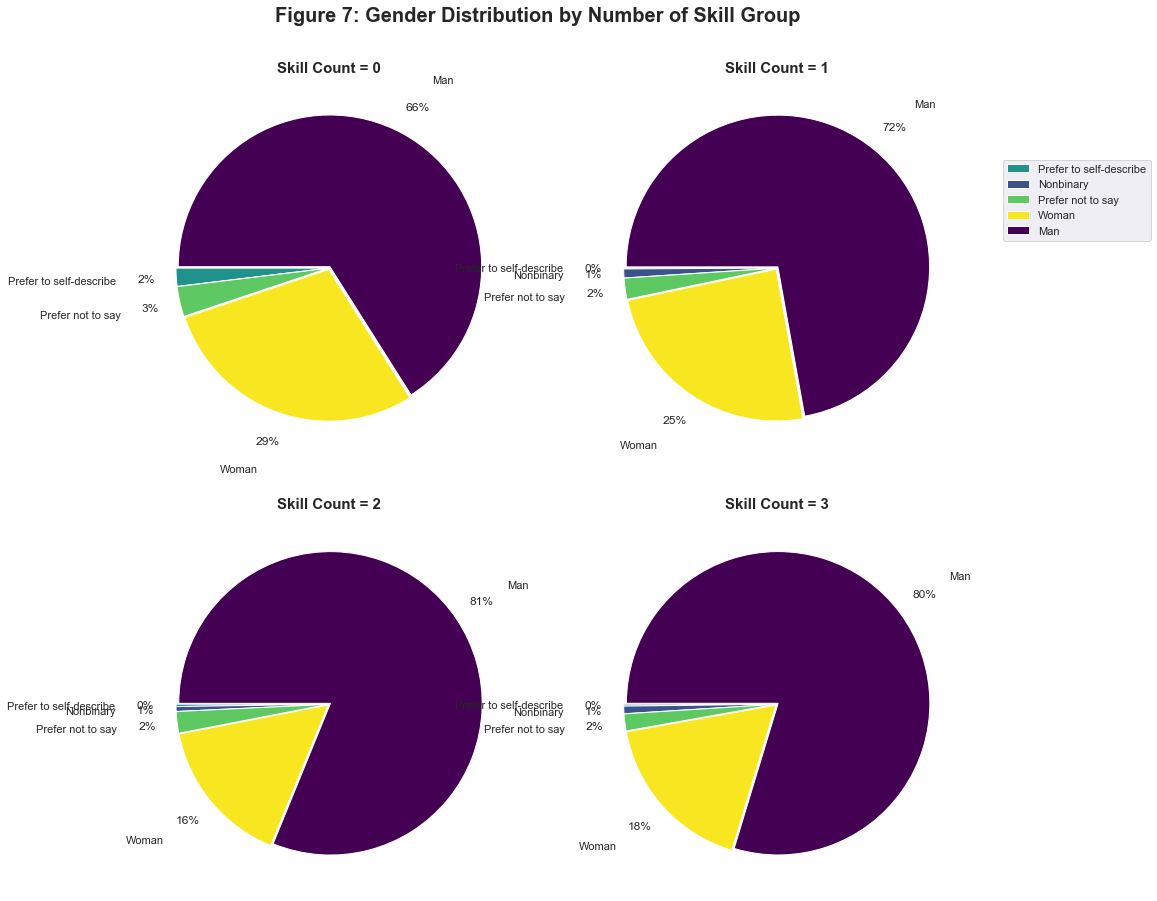

In [34]:
# get percentages df pivoted
dfs = [df_zero, df_one, df_two, df_tri]
count_order = [0, 1, 2, 3]

df_pivoted = pd.DataFrame(columns = ['Skill Count', 'Labels', 'Proportion', 'Percent'])

for (df, count) in zip(dfs, count_order): 
    data_crosstab = pd.crosstab(df['Count of Skills'], df['Q2'], margins = True)
    labels = list(df['Q2'].unique())
    for label in labels:
        prob = data_crosstab.at[count, label ] / data_crosstab.at[count, 'All']
        new_row = {'Skill Count' : count, 'Labels' : label, 'Proportion' : prob, 'Percent' : round(prob * 100,2)}
        df_pivoted = df_pivoted.append(new_row ,ignore_index = True)    

df_pie_0 = df_pivoted.loc[(df_pivoted['Skill Count'] == 0 )]
df_pie_0 = df_pie_0.sort_values(by = 'Proportion', ascending = True).reset_index(drop = True)

df_pie_1 = df_pivoted.loc[(df_pivoted['Skill Count'] == 1 )]
df_pie_1 = df_pie_1.sort_values( by = 'Proportion', ascending = True).reset_index(drop = True)

df_pie_2 = df_pivoted.loc[(df_pivoted['Skill Count'] == 2 )]
df_pie_2 = df_pie_2.sort_values( by = 'Proportion', ascending = True).reset_index(drop = True)

df_pie_3 = df_pivoted.loc[(df_pivoted['Skill Count'] == 3 )]
df_pie_3 = df_pie_3.sort_values( by = 'Proportion', ascending = True).reset_index(drop = True)

#plot settings
fig, axs = plt.subplots(2,2,figsize=(15,15))
fig.subplots_adjust(hspace=0.15, wspace=0.15)
(ax0, ax1), (ax2, ax3) = axs

# color mapping labels
import matplotlib

cmap = matplotlib.cm.get_cmap('viridis')

c1 = cmap(0)
c2 = cmap(.25)
c3 = cmap(.50)
c4 = cmap(.75)
c5 = cmap(.99)

colours={'Man': c1, 
        'Nonbinary':c2,
        'Woman' : c5,
        'Prefer not to say' : c4,
        'Prefer to self-describe' : c3}

# ========================
# ax0
labels = df_pie_0['Labels']
percentages = df_pie_0['Percent']
explode=([.01] * len(labels))


ax0.pie(percentages, explode=explode, labels=labels, colors=[colours[key] for key in labels], 
        autopct='%1.0f%%', 
       shadow=False, startangle=180,   
       pctdistance=1.2,labeldistance=1.4)
ax0.set_title("Skill Count = 0",fontsize=15, weight='bold')

# ========================
# ax1
labels = df_pie_1['Labels']
percentages = df_pie_1['Percent']
explode=([.01] * len(labels))


ax1.pie(percentages, explode=explode, labels=labels,  colors=[colours[key] for key in labels],
        autopct='%1.0f%%', 
       shadow=False, startangle=180,   
       pctdistance=1.2,labeldistance=1.4)
ax1.set_title("Skill Count = 1",fontsize=15, weight='bold')
ax1.legend(frameon=True, bbox_to_anchor=(1.5,0.8))

# ========================
# ax2
labels = df_pie_2['Labels']
percentages = df_pie_2['Percent']
explode=([.01] * len(labels))

ax2.pie(percentages, explode=explode, labels=labels, colors=[colours[key] for key in labels],
        autopct='%1.0f%%', 
       shadow=False, startangle=180,   
       pctdistance=1.2,labeldistance=1.4)
ax2.set_title("Skill Count = 2",fontsize=15, weight='bold')

# ========================
# ax3
labels = list(df_pie_3['Labels'])
percentages = list(df_pie_3['Percent'])
explode=([.01] * len(labels))

ax3.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=180,   
       pctdistance=1.2,labeldistance=1.4,colors=[colours[key] for key in labels])
ax3.set_title("Skill Count = 3", fontsize=15, weight='bold')


# Title
plt.text(1.05, 1.15, 'Figure 7: Gender Distribution by Number of Skill Group',weight='bold',
         horizontalalignment='center',fontsize=20,transform = ax0.transAxes)

Ok, what about education of the skill groups? Let's compare the education levels across the age groups with Figure 8. We can ee that high skill count groups tend to have a master's degree as their highest or currently actively pursueing that degree. There is a link here, participants with more skills have a high education. 

Text(1.05, 1.15, 'Figure 8: Education Percent Distribution by Number of Skill Group')

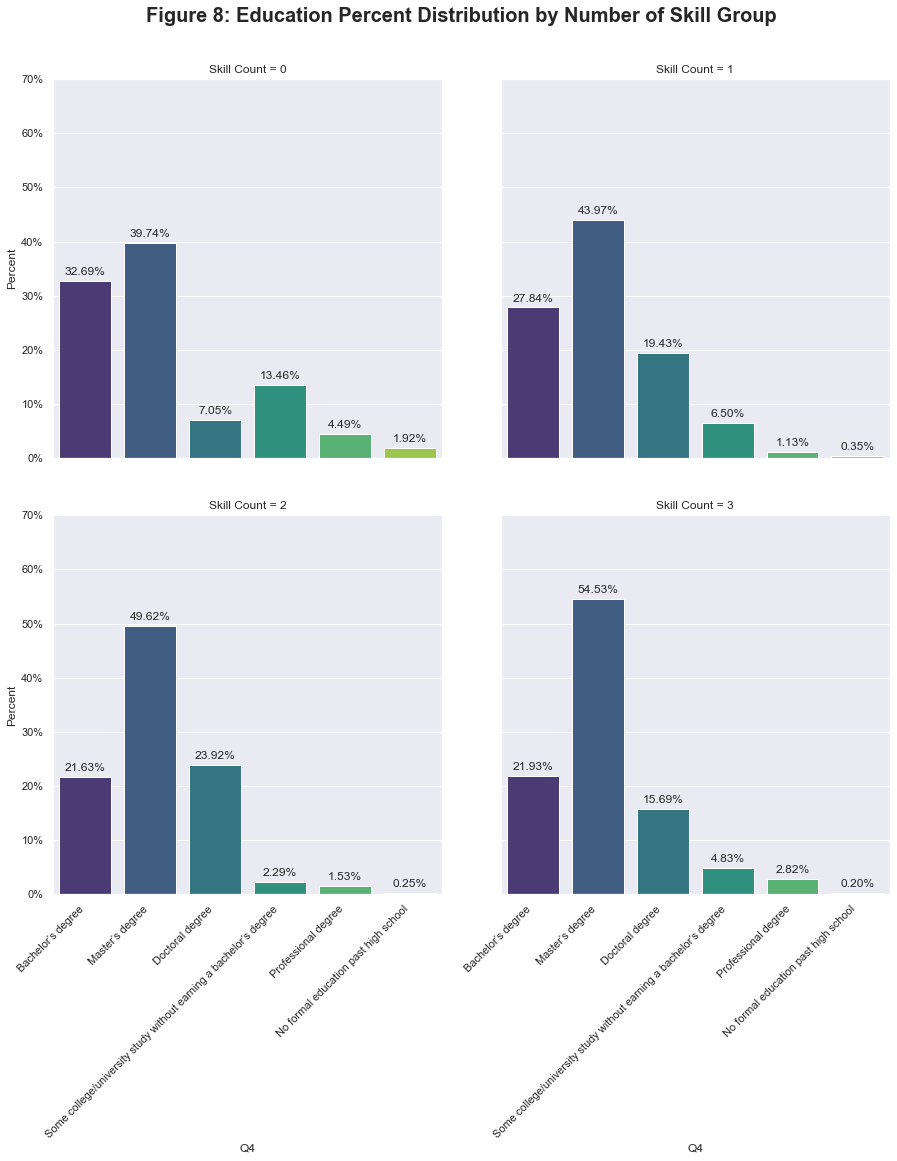

In [35]:
#plot settings
fig, axs = plt.subplots(2,2,figsize=(15,15),sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.15, wspace=0.15)
(ax0, ax1), (ax2, ax3) = axs

order = ['Bachelor’s degree', 'Master’s degree', 'Doctoral degree', 
         'Some college/university study without earning a bachelor’s degree', 'Professional degree', 
         'No formal education past high school']
#===================
# Skill 0 count point

# Aggregate counts as percentages
grouped_count_0 = df_zero.groupby(by = ['Q4']).count().reset_index(drop = False)[['Q4', 'Count of Skills']]
grouped_count_0['Count of Skills'] = grouped_count_0['Count of Skills'] / sum(grouped_count_0['Count of Skills'])
grouped_count_0 = grouped_count_0.rename(columns={'Count of Skills': 'Percent'})
percent_df_0 = grouped_count_0
percent_df_0

# plot options
sns.barplot(x = 'Q4', y = 'Percent', data = percent_df_0, order = order, ax = ax0,
            palette='viridis')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, horizontalalignment='right')
ax0.set(ylim=(0, .7))
ax0.set_xlabel('')
vals = ax0.get_yticks()
ax0.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax0.title.set_text('Skill Count = 0')


# annotate bar plots
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.2%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

#===================
# Skill 1 count point

# Aggregate counts as percentages
grouped_count_1 = df_one.groupby(by = ['Q4']).count().reset_index(drop = False)[['Q4', 'Count of Skills']]
grouped_count_1['Count of Skills'] = grouped_count_1['Count of Skills'] / sum(grouped_count_1['Count of Skills'])
grouped_count_1 = grouped_count_1.rename(columns={'Count of Skills': 'Percent'})
percent_df_1 = grouped_count_1
percent_df_1

# plot options
sns.barplot(x = 'Q4', y = 'Percent', data = percent_df_1, order = order, ax = ax1,
            palette='viridis')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set(ylim=(0, .7))
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.title.set_text('Skill Count = 1')

# annotate bar plots
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
#===================    
# Skill 2 count point

# Aggregate counts as percentages
grouped_count_2 = df_two.groupby(by = ['Q4']).count().reset_index(drop = False)[['Q4', 'Count of Skills']]
grouped_count_2['Count of Skills'] = grouped_count_2['Count of Skills'] / sum(grouped_count_2['Count of Skills'])
grouped_count_2 = grouped_count_2.rename(columns={'Count of Skills': 'Percent'})
percent_df_2 = grouped_count_2
percent_df_2

# plot options
sns.barplot(x = 'Q4', y = 'Percent', data = percent_df_2, order = order, ax = ax2,
            palette='viridis')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
ax2.set(ylim=(0, .7))
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax2.title.set_text('Skill Count = 2')

# annotate bar plots
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
#===================
# Skill 3 bar plot

# Aggregate counts as percentages
grouped_count_3 = df_tri.groupby(by = ['Q4']).count().reset_index(drop = False)[['Q4', 'Count of Skills']]
grouped_count_3['Count of Skills'] = grouped_count_3['Count of Skills'] / sum(grouped_count_3['Count of Skills'])
grouped_count_3 = grouped_count_3.rename(columns={'Count of Skills': 'Percent'})
percent_df_3 = grouped_count_3
percent_df_3

# plot options
sns.barplot(x = 'Q4', y = 'Percent', data = percent_df_3, order = order, ax = ax3,
            palette='viridis')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')
ax3.set(ylim=(0, .7))
ax3.set_ylabel('')
ax3.title.set_text('Skill Count = 3')

# annotate bar plots
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.2%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# title
plt.text(1.05, 1.15, 'Figure 8: Education Percent Distribution by Number of Skill Group',weight='bold',
         horizontalalignment='center',fontsize=20,transform = ax0.transAxes)